In [25]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

%matplotlib inline

In [26]:
df = pd.read_csv("data/banknotes.csv")

In [27]:
df.head()

,variace,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [28]:
df['class'].value_counts()

0    762
1    610
Name: class, dtype: int64

In [29]:
import seaborn as sns

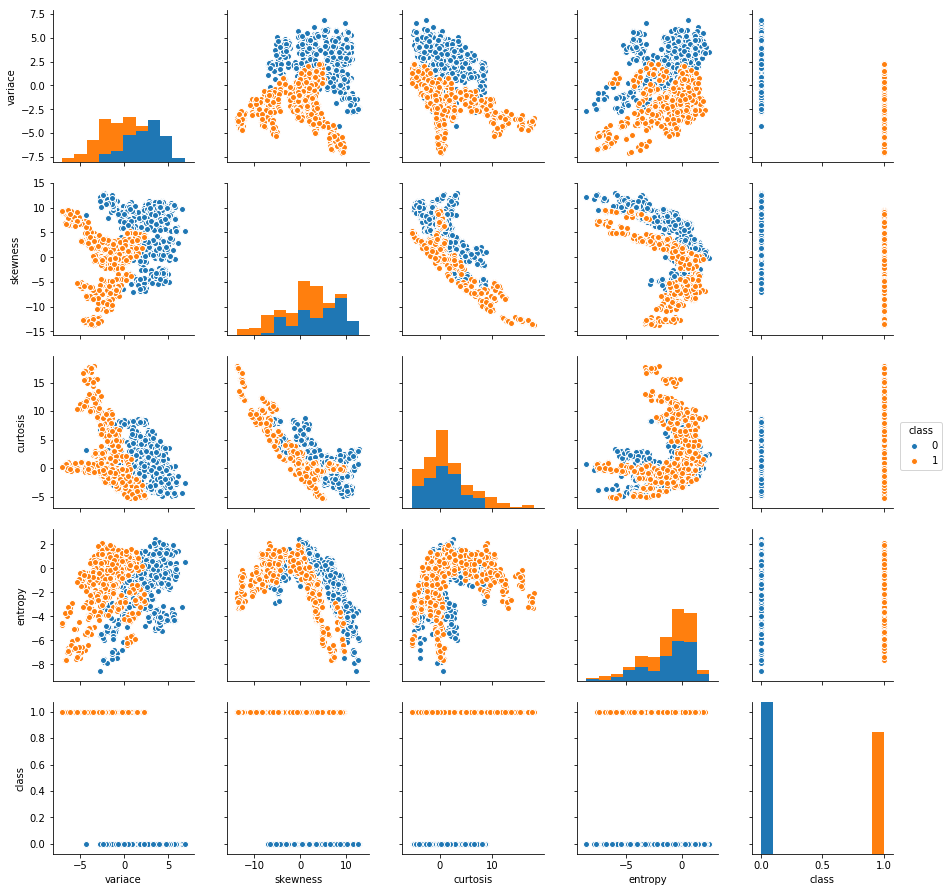

In [30]:
sns.pairplot(df, hue="class")

In [31]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import scale

In [32]:
X = scale(df.drop('class', axis=1).values)
y = df['class'].values

In [33]:
model = RandomForestClassifier()
cross_val_score(model, X, y)

array([0.99126638, 0.99343545, 0.99781182])

<h1>Logistic Regression Model</h1>

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [35]:
import keras.backend as K 
from keras.models import Sequential 
from keras.layers import Dense, Activation 
from keras.optimizers import SGD

In [36]:
K.clear_session()

model = Sequential()
model.add(Dense(1, input_shape=(4,), activation='sigmoid'))
model.compile(loss='binary_crossentropy',
             optimizer='sgd',
             metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=10, verbose=0)
result = model.evaluate(X_test, y_test)

412/412 [==============================] - 0s 60us/step


In [37]:
historydf = pd.DataFrame(history.history, index=history.epoch)

Text(0.5,1,'Test accuracy:60.2%')

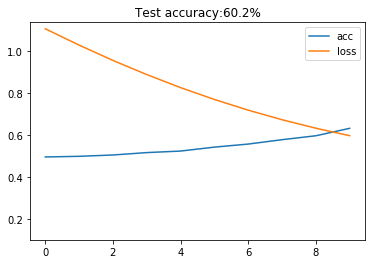

In [38]:
historydf.plot(ylim=0.1)
plt.title("Test accuracy:{:3.1f}%".format(result[0]*100, fontsize=15))

In [39]:
dflist = []
learning_rates = [0.01, 0.05, 0.1, 0.5]

for lr in learning_rates:
    K.clear_session()
    
    model = Sequential()
    model.add(Dense(1, input_shape=(4,), activation='sigmoid'))
    model.compile(loss='binary_crossentropy',
                 optimizer=SGD(lr=lr),
                 metrics=['accuracy'])
    h = model.fit(X_train, y_train, batch_size=16, epochs=5, verbose=0)
    
    dflist.append(pd.DataFrame(h.history, index=h.epoch))

In [40]:
historydf = pd.concat(dflist, axis=1)
historydf
metrics_reported = dflist[0].columns
idx = pd.MultiIndex.from_product([learning_rates, metrics_reported],
                                names=['learning_rate', 'metric'])
historydf.columns = idx

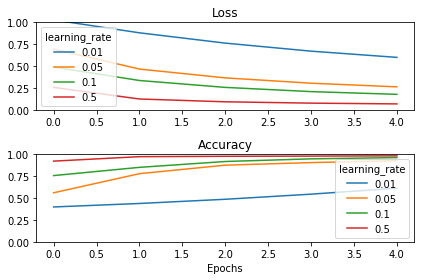

In [41]:
ax = plt.subplot(211)
historydf.xs('loss', axis=1, level='metric').plot(ylim=(0, 1), ax=ax)
plt.title('Loss')

ax = plt.subplot(212)
historydf.xs('acc', axis=1, level='metric').plot(ylim=(0, 1), ax=ax)
plt.title('Accuracy')
plt.xlabel("Epochs")

plt.tight_layout()

<h1>Batch Sizes</h1>

In [42]:
dflist = []
batch_sizes = [16, 32, 64, 128]

for batch_size in batch_sizes:
    K.clear_session()
    
    model = Sequential()
    model.add(Dense(1, input_shape=(4,), activation='sigmoid'))
    model.compile(loss='binary_crossentropy',
                 optimizer='sgd',
                 metrics=['accuracy'])
    h = model.fit(X_train, y_train, batch_size=batch_size, epochs=5, verbose=0)
    
    dflist.append(pd.DataFrame(h.history, index=h.epoch))

In [43]:
historydf = pd.concat(dflist, axis=1)
metrics_reported = dflist[0].columns
idx = pd.MultiIndex.from_product([learning_rates, metrics_reported],
                                names=['learning_rate', 'metric'])
historydf.columns = idx
historydf

learning_rate      0.01                0.05                0.10            \
metric              acc      loss       acc      loss       acc      loss   
0              0.372917  1.076150  0.801042  0.507067  0.379167  0.825218   
1              0.419792  0.934486  0.808333  0.488337  0.417708  0.802723   
2              0.461458  0.821880  0.813542  0.472045  0.469792  0.781839   
3              0.519792  0.733938  0.814583  0.457723  0.502083  0.762408   
4              0.608333  0.665484  0.821875  0.444908  0.520833  0.744308   

learning_rate      0.50            
metric              acc      loss  
0              0.788542  0.487890  
1              0.796875  0.478207  
2              0.807292  0.468919  
3              0.826042  0.459944  
4              0.834375  0.451571

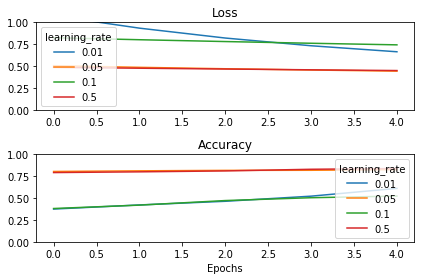

In [44]:
ax = plt.subplot(211)
historydf.xs('loss', axis=1, level='metric').plot(ylim=(0, 1), ax=ax)
plt.title('Loss')

ax = plt.subplot(212)
historydf.xs('acc', axis=1, level='metric').plot(ylim=(0, 1), ax=ax)
plt.title('Accuracy')
plt.xlabel("Epochs")

plt.tight_layout()

<h1>Optimizers</h1>

In [45]:
from keras.optimizers import SGD, Adam, Adagrad, RMSprop

In [49]:
dflist = []

optimizers = ['SGD(lr=0.01)',
             'SGD(lr=0.01, momentum=0.3)',
             'SGD(lr=0.01, momentum=0.3, nesterov=True)',
             'Adam(lr=0.01)',
             'Adagrad(lr=0.01)',
             'RMSprop(lr=0.01)']

for opt_name in optimizers:
    K.clear_session()
    
    model = Sequential() 
    model.add(Dense(1, input_shape=(4,), activation='sigmoid'))
    model.compile(loss='binary_crossentropy',
                 optimizer=eval(opt_name),
                 metrics=['accuracy'])
    h = model.fit(X_train, y_train, batch_size=16, epochs=5, verbose=0)
    
    dflist.append(pd.DataFrame(h.history, index=h.epoch))

In [51]:
historydf = pd.concat(dflist, axis=1)
metrics_reported = dflist[0].columns
idx = pd.MultiIndex.from_product([optimizers, metrics_reported],
                                names=['optimizers', 'metrics'])
historydf.columns = idx

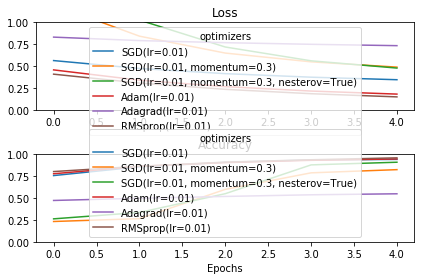

In [53]:
ax = plt.subplot(211)
historydf.xs('loss', axis=1, level='metrics').plot(ylim=(0, 1), ax=ax)
plt.title('Loss')

ax = plt.subplot(212)
historydf.xs('acc', axis=1, level='metrics').plot(ylim=(0, 1), ax=ax)
plt.title('Accuracy')
plt.xlabel('Epochs')

plt.tight_layout()

<h1>Weight Initialization</h1>

In [56]:
dflist = []

initializers = [
    'zeros', 'uniform', 'normal',
    'he_normal', 'lecun_uniform'
]

for init in initializers:
    K.clear_session() 
    
    model = Sequential() 
    model.add(Dense(1, input_shape=(4,), kernel_initializer=init, activation='sigmoid'))
    
    model.compile(loss='binary_crossentropy',
                 optimizer='rmsprop',
                 metrics=['accuracy'])
    h = model.fit(X_train, y_train, batch_size=16, epochs=5, verbose=0)
    
    dflist.append(pd.DataFrame(h.history, index=h.epoch))
    
    

In [57]:
historydf = pd.concat(dflist, axis=1)
metrics_reported = dflist[0].columns
idx = pd.MultiIndex.from_product([initializers, metrics_reported],
                                names=['initializers', 'metric'])
historydf.columns = idx

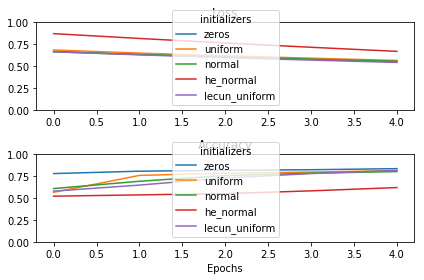

In [58]:
ax = plt.subplot(211)
historydf.xs('loss', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title('Loss')

ax = plt.subplot(212)
historydf.xs('acc', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title('Accuracy')
plt.xlabel('Epochs')

plt.tight_layout()

<h1>Inner layer</h1>

In [59]:
K.clear_session()

model = Sequential() 
model.add(Dense(2, input_shape=(4,), activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
             optimizer=RMSprop(lr=0.01),
             metrics=['accuracy'])
h = model.fit(X_train, y_train, batch_size=16, epochs=20, verbose=1, validation_split=0.1)
result = model.evaluate(X_test, y_test)

Train on 864 samples, validate on 96 samples
Epoch 1/20
864/864 [==============================] - 0s 374us/step - loss: 0.5838 - acc: 0.6227 - val_loss: 0.4799 - val_acc: 0.8125
Epoch 2/20
864/864 [==============================] - 0s 154us/step - loss: 0.3667 - acc: 0.8403 - val_loss: 0.2463 - val_acc: 0.9271
Epoch 3/20
864/864 [==============================] - 0s 147us/step - loss: 0.2062 - acc: 0.9340 - val_loss: 0.1417 - val_acc: 0.9688
Epoch 4/20
864/864 [==============================] - 0s 149us/step - loss: 0.1221 - acc: 0.9549 - val_loss: 0.0893 - val_acc: 0.9792
Epoch 5/20
864/864 [==============================] - 0s 142us/step - loss: 0.0782 - acc: 0.9699 - val_loss: 0.0648 - val_acc: 0.9792
Epoch 6/20
864/864 [==============================] - 0s 148us/step - loss: 0.0524 - acc: 0.9803 - val_loss: 0.0481 - val_acc: 0.9792
Epoch 7/20
864/864 [==============================] - 0s 151us/step - loss: 0.0368 - acc: 0.9896 - val_loss: 0.0396 - val_acc: 0.9792
Epoch 8/20
864/86

In [60]:
result

[0.026266694701846362, 0.9878640776699029]

In [61]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 2)                 10        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 3         
Total params: 13
Trainable params: 13
Non-trainable params: 0
_________________________________________________________________


In [62]:
inp = model.layers[0].input
out = model.layers[0].output

In [63]:
inp

<tf.Tensor 'dense_1_input:0' shape=(?, 4) dtype=float32>

In [64]:
out

<tf.Tensor 'dense_1/Relu:0' shape=(?, 2) dtype=float32>

In [65]:
features_function = K.function([inp], [out])

In [66]:
features = features_function([X_test])[0]

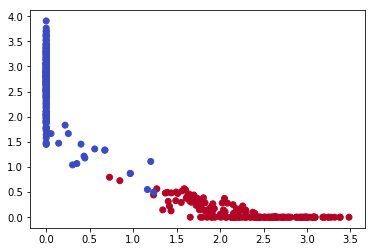

In [68]:
plt.scatter(features[:,0], features[:, 1], c=y_test, cmap='coolwarm')

In [71]:
K.clear_session()

model = Sequential() 
model.add(Dense(3, input_shape=(4,), activation='relu'))
model.add(Dense(2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
             optimizer=RMSprop(lr=0.01),
             metrics=['accuracy'])

412/412 [==============================] - 0s 33us/step


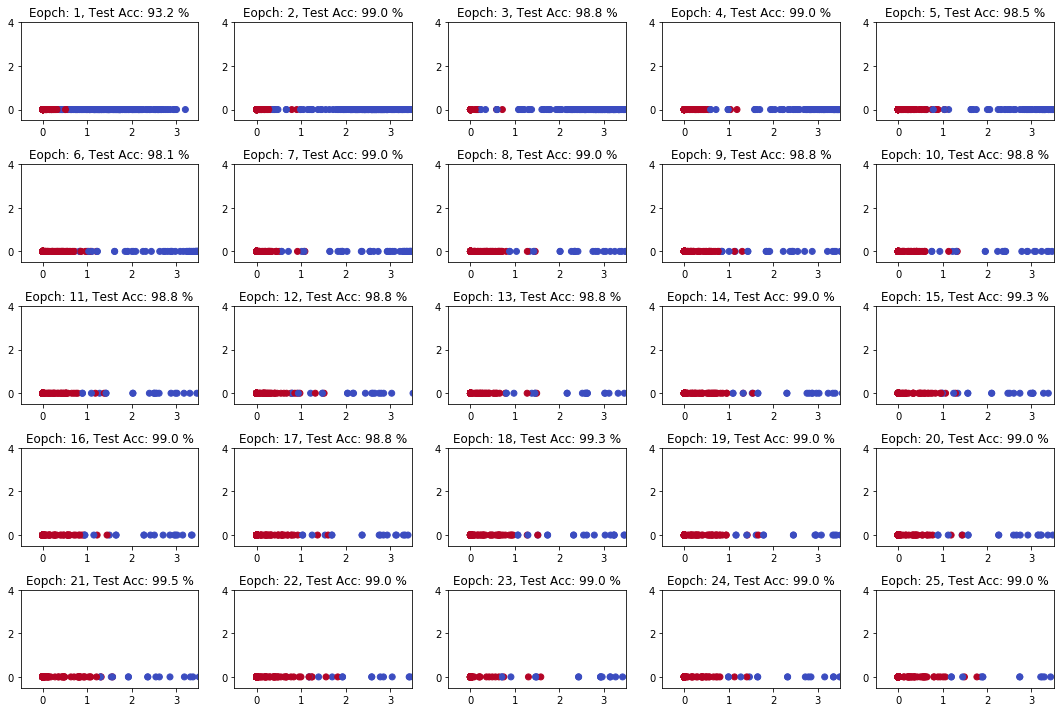

In [72]:
inp = model.layers[0].input 
out = model.layers[1].output 
features_function = K.function([inp], [out])

plt.figure(figsize=(15, 10))

for i in range(1, 26):
    plt.subplot(5, 5, i)
    h = model.fit(X_train, y_train, batch_size=16, epochs=1, verbose=0)
    test_accuracy = model.evaluate(X_test, y_test)[1]
    features = features_function([X_test])[0]
    plt.scatter(features[:, 0], features[:, 1], c=y_test, cmap='coolwarm')
    plt.xlim(-0.5, 3.5)
    plt.ylim(-0.5, 4.0)
    plt.title('Eopch: {}, Test Acc: {:3.1f} %'.format(i, test_accuracy * 100.0 ))
    
plt.tight_layout()